<a href="https://colab.research.google.com/github/datascience-uniandes/linear-regression-tutorial/blob/master/crabs/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Apartamentos

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

**Business context:** Predicción de precios de apartamentos en Bogotá para HabitAlpes.


In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

## 1. Carga de los datos

In [3]:
ruta_archivo = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\GitHub\Quiz 3\apartamentos.csv'

In [4]:
apartamentos_df = pd.read_csv(ruta_archivo)

## 2. Entendimiento y limpieza de los datos

Para entrenar un modelo de regresión todas las variables de entrada (features) deben ser numéricas. Se seleccionan las variables numéricas que se consideran más importantes para la estimación de la variable objetivo (target) `precio_venta`. 

Adicionalmente, tanto las variables de entrada como la variable objetivo no deben contener valores vacíos. Se decide eliminar los registros que tengan valores vacíos en algunas de estas y eliminar los outliers.

In [5]:
apartamentos_df.shape

(43013, 46)

In [6]:
apartamentos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 14  longitud              

In [7]:
apartamentos_df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,3.0,ENTRE 10 Y 20 ANOS,4.746592,-74.057571,CARRERA 55A # 163-35,"apartamento en venta de 76m2, con vista exteri...",habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,3.0,MAS DE 20 ANOS,4.730111,-74.028170,CARRERA 7F # 153 - 75,"apartamento en venta de 60m2, con vista interi...",habi.co,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,3.0,ENTRE 0 Y 5 ANOS,4.607378,-74.082648,CARRERA 69C #2 - 60,"apartamento en venta de 54m2, con vista exteri...",habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,TIBABUYES,2.0,ENTRE 10 Y 20 ANOS,4.740109,-74.113675,CALLE 131C # 126-95,"apartamento en venta de 43 m2, con vista inter...",habi.co,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,SUBA,LA ESTRELLA II,Portal Suba,2275.08,0,PARQUE ZONAL LA GAITANA,539.98,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,VERBENAL,3.0,MAS DE 20 ANOS,4.763900,-74.025280,CARRERA 5 # 187-15,"apartamento duplex en venta de 48m2, con vista...",habi.co,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,2099.16,0,PARQUE VECINAL DESARROLLO VERBENAL I,1661.14,0


In [8]:
apartamentos_df["tipo_operacion"].value_counts(dropna=False, normalize=True)

tipo_operacion
VENTA               0.633994
ARRIENDO            0.360705
VENTA Y ARRIENDO    0.005301
Name: proportion, dtype: float64

In [9]:
apartamentos_df["tipo_propiedad"].value_counts(dropna=False, normalize=True)

tipo_propiedad
APARTAMENTO                  0.998373
CASA CON CONJUNTO CERRADO    0.001395
CASA                         0.000232
Name: proportion, dtype: float64

In [10]:
apartamentos_df = apartamentos_df[
    (apartamentos_df["tipo_propiedad"] == "APARTAMENTO") &
    (apartamentos_df["tipo_operacion"] == "VENTA")]

In [11]:
apartamentos_df.shape

(27200, 46)

In [12]:
apartamentos_df = apartamentos_df.dropna(subset=['precio_venta'])

In [13]:
columnas_relevantes = [
    'area', 'habitaciones', 'banos', 'estrato', 'parqueaderos','administracion',
    'is_cerca_estacion_tm', 'is_cerca_parque'
]

In [14]:
apartamentos_modelo_df = apartamentos_df[["precio_venta"]+columnas_relevantes].copy()

In [15]:
apartamentos_modelo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27200 entries, 0 to 43012
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precio_venta          27200 non-null  float64
 1   area                  27200 non-null  float64
 2   habitaciones          27200 non-null  float64
 3   banos                 27200 non-null  float64
 4   estrato               27199 non-null  float64
 5   parqueaderos          27200 non-null  float64
 6   administracion        24810 non-null  float64
 7   is_cerca_estacion_tm  27200 non-null  int64  
 8   is_cerca_parque       27200 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 2.1 MB


In [16]:
apartamentos_modelo_df.isnull().sum() / apartamentos_modelo_df.shape[0]

precio_venta            0.000000
area                    0.000000
habitaciones            0.000000
banos                   0.000000
estrato                 0.000037
parqueaderos            0.000000
administracion          0.087868
is_cerca_estacion_tm    0.000000
is_cerca_parque         0.000000
dtype: float64

In [17]:
apartamentos_modelo_df.shape

(27200, 9)

In [18]:
apartamentos_modelo_df = apartamentos_modelo_df.dropna()

In [19]:
apartamentos_modelo_df.shape

(24809, 9)

In [20]:
apartamentos_modelo_df.isnull().sum() / apartamentos_modelo_df.shape[0]

precio_venta            0.0
area                    0.0
habitaciones            0.0
banos                   0.0
estrato                 0.0
parqueaderos            0.0
administracion          0.0
is_cerca_estacion_tm    0.0
is_cerca_parque         0.0
dtype: float64

In [21]:
duplicates = apartamentos_modelo_df.duplicated()
print(f"\nNumber of duplicate records (rows): {duplicates.sum()}")


Number of duplicate records (rows): 1889


In [22]:
apartamentos_modelo_df = apartamentos_modelo_df.drop_duplicates()

print(f"Datos después de eliminar duplicados: {apartamentos_modelo_df.shape[0]} filas")

Datos después de eliminar duplicados: 22920 filas


In [23]:
apartamentos_modelo_df.head()

,precio_venta,area,habitaciones,banos,estrato,parqueaderos,administracion,is_cerca_estacion_tm,is_cerca_parque
0,339000000.0,76.0,3.0,2.0,3.0,1.0,300000.0,0,1
2,440898168.0,54.0,3.0,2.0,3.0,0.0,305000.0,1,0
3,158000000.0,43.0,2.0,2.0,2.0,0.0,106600.0,0,0
4,222800000.0,48.0,3.0,2.0,3.0,0.0,151000.0,0,0
5,128900000.0,47.0,2.0,1.0,2.0,0.0,86500.0,0,1


In [24]:
apartamentos_modelo_df["precio_venta"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).apply(lambda x: "${:,.0f}".format(x))

count               $22,920
mean         $2,624,682,695
std         $61,116,749,115
min              $1,000,000
5%             $188,643,700
25%            $425,000,000
50%            $730,000,000
75%          $1,350,000,000
95%          $3,050,000,000
max      $4,250,000,000,000
Name: precio_venta, dtype: object

In [25]:
factor_iqr = 1.5

q1_precio = apartamentos_modelo_df["precio_venta"].quantile(0.25)
q3_precio = apartamentos_modelo_df["precio_venta"].quantile(0.75)
iqr_precio = q3_precio - q1_precio

apartamentos_modelo_df = apartamentos_modelo_df.loc[(apartamentos_modelo_df["precio_venta"] >= q1_precio - factor_iqr * iqr_precio) & (apartamentos_modelo_df["precio_venta"] <= q3_precio + factor_iqr * iqr_precio)]

print(f"Datos después de eliminar outliers: {apartamentos_modelo_df.shape[0]} filas")

Datos después de eliminar outliers: 21351 filas


In [26]:
apartamentos_modelo_df = apartamentos_modelo_df[apartamentos_modelo_df["precio_venta"] > 100000000]

In [27]:
apartamentos_modelo_df["precio_venta"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).apply(lambda x: "${:,.0f}".format(x))

count           $21,286
mean       $855,887,267
std        $591,835,198
min        $101,800,000
5%         $187,625,455
25%        $403,000,000
50%        $680,000,000
75%      $1,200,000,000
95%      $2,100,000,000
max      $2,720,500,000
Name: precio_venta, dtype: object

In [28]:
apartamentos_modelo_df["area"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    21286.000000
mean       130.504920
std        244.057714
min          0.000000
5%          42.000000
25%         68.820000
50%        106.000000
75%        166.000000
95%        270.000000
max      19621.000000
Name: area, dtype: float64

In [29]:
q1_area = apartamentos_modelo_df["area"].quantile(0.25)
q3_area = apartamentos_modelo_df["area"].quantile(0.75)
iqr_area = q3_area - q1_area

apartamentos_modelo_df = apartamentos_modelo_df.loc[(apartamentos_modelo_df["area"] >= q1_area - factor_iqr * iqr_area) & (apartamentos_modelo_df["area"] <= q3_area + factor_iqr * iqr_area)]

print(f"Datos después de eliminar outliers: {apartamentos_modelo_df.shape[0]} filas")

Datos después de eliminar outliers: 20786 filas


In [30]:
apartamentos_modelo_df = apartamentos_modelo_df[apartamentos_modelo_df["area"] > 15]

In [31]:
apartamentos_modelo_df["area"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    20757.000000
mean       119.744166
std         64.575569
min         15.530000
5%          42.000000
25%         68.000000
50%        104.000000
75%        160.000000
95%        250.000000
max        311.770000
Name: area, dtype: float64

In [32]:
apartamentos_modelo_df["administracion"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).apply(lambda x: "${:,.0f}".format(x))

count           $20,757
mean         $4,530,867
std         $64,608,701
min                  $1
5%             $109,200
25%            $336,000
50%            $600,000
75%          $1,008,600
95%          $1,780,000
max      $2,400,000,000
Name: administracion, dtype: object

In [33]:
q1_administracion = apartamentos_modelo_df["administracion"].quantile(0.25)
q3_administracion = apartamentos_modelo_df["administracion"].quantile(0.75)
iqr_administracion = q3_administracion - q1_administracion

apartamentos_modelo_df = apartamentos_modelo_df.loc[(apartamentos_modelo_df["administracion"] >= q1_administracion - factor_iqr * iqr_administracion) & (apartamentos_modelo_df["administracion"] <= q3_administracion + factor_iqr * iqr_administracion)]

print(f"Datos después de eliminar outliers: {apartamentos_modelo_df.shape[0]} filas")

Datos después de eliminar outliers: 20212 filas


In [34]:
apartamentos_modelo_df = apartamentos_modelo_df[apartamentos_modelo_df["administracion"] > 100000]

In [35]:
apartamentos_modelo_df["administracion"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).apply(lambda x: "${:,.0f}".format(x))

count       $19,268
mean       $719,822
std        $449,657
min        $100,100
5%         $150,535
25%        $360,000
50%        $608,000
75%      $1,000,000
95%      $1,600,000
max      $2,017,000
Name: administracion, dtype: object

In [36]:
apartamentos_modelo_df["habitaciones"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19268.000000
mean         2.676874
std          0.744462
min          1.000000
5%           1.000000
25%          2.000000
50%          3.000000
75%          3.000000
95%          4.000000
max          7.000000
Name: habitaciones, dtype: float64

In [37]:
apartamentos_modelo_df["banos"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19268.000000
mean         2.746730
std          1.050054
min          0.000000
5%           1.000000
25%          2.000000
50%          3.000000
75%          3.000000
95%          5.000000
max          6.000000
Name: banos, dtype: float64

In [38]:
apartamentos_modelo_df = apartamentos_modelo_df[apartamentos_modelo_df["banos"] > 0]

In [39]:
apartamentos_modelo_df["banos"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19259.000000
mean         2.748014
std          1.048619
min          1.000000
5%           1.000000
25%          2.000000
50%          3.000000
75%          3.000000
95%          5.000000
max          6.000000
Name: banos, dtype: float64

In [40]:
apartamentos_modelo_df["estrato"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19259.000000
mean         4.890804
std          1.120420
min          0.000000
5%           3.000000
25%          4.000000
50%          5.000000
75%          6.000000
95%          6.000000
max          6.000000
Name: estrato, dtype: float64

In [41]:
apartamentos_modelo_df = apartamentos_modelo_df[apartamentos_modelo_df["estrato"] > 0]

In [42]:
apartamentos_modelo_df["estrato"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19257.000000
mean         4.891312
std          1.119369
min          1.000000
5%           3.000000
25%          4.000000
50%          5.000000
75%          6.000000
95%          6.000000
max          6.000000
Name: estrato, dtype: float64

In [43]:
apartamentos_modelo_df["parqueaderos"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19257.000000
mean         1.682038
std          0.925847
min         -2.000000
5%           0.000000
25%          1.000000
50%          2.000000
75%          2.000000
95%          3.000000
max         30.000000
Name: parqueaderos, dtype: float64

In [44]:
apartamentos_modelo_df = apartamentos_modelo_df[(apartamentos_modelo_df["parqueaderos"] >= 0) & (apartamentos_modelo_df["parqueaderos"] < 30)]


In [45]:
apartamentos_modelo_df["parqueaderos"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    19255.000000
mean         1.680758
std          0.902734
min          0.000000
5%           0.000000
25%          1.000000
50%          2.000000
75%          2.000000
95%          3.000000
max          4.000000
Name: parqueaderos, dtype: float64

In [46]:
apartamentos_modelo_df.shape

(19255, 9)

In [47]:
apartamentos_modelo_df.head()

,precio_venta,area,habitaciones,banos,estrato,parqueaderos,administracion,is_cerca_estacion_tm,is_cerca_parque
0,339000000.0,76.0,3.0,2.0,3.0,1.0,300000.0,0,1
2,440898168.0,54.0,3.0,2.0,3.0,0.0,305000.0,1,0
3,158000000.0,43.0,2.0,2.0,2.0,0.0,106600.0,0,0
4,222800000.0,48.0,3.0,2.0,3.0,0.0,151000.0,0,0
6,190000000.0,38.0,2.0,1.0,3.0,0.0,178600.0,0,0


### 2.1. Búsqueda de relaciones con la variable objetivo


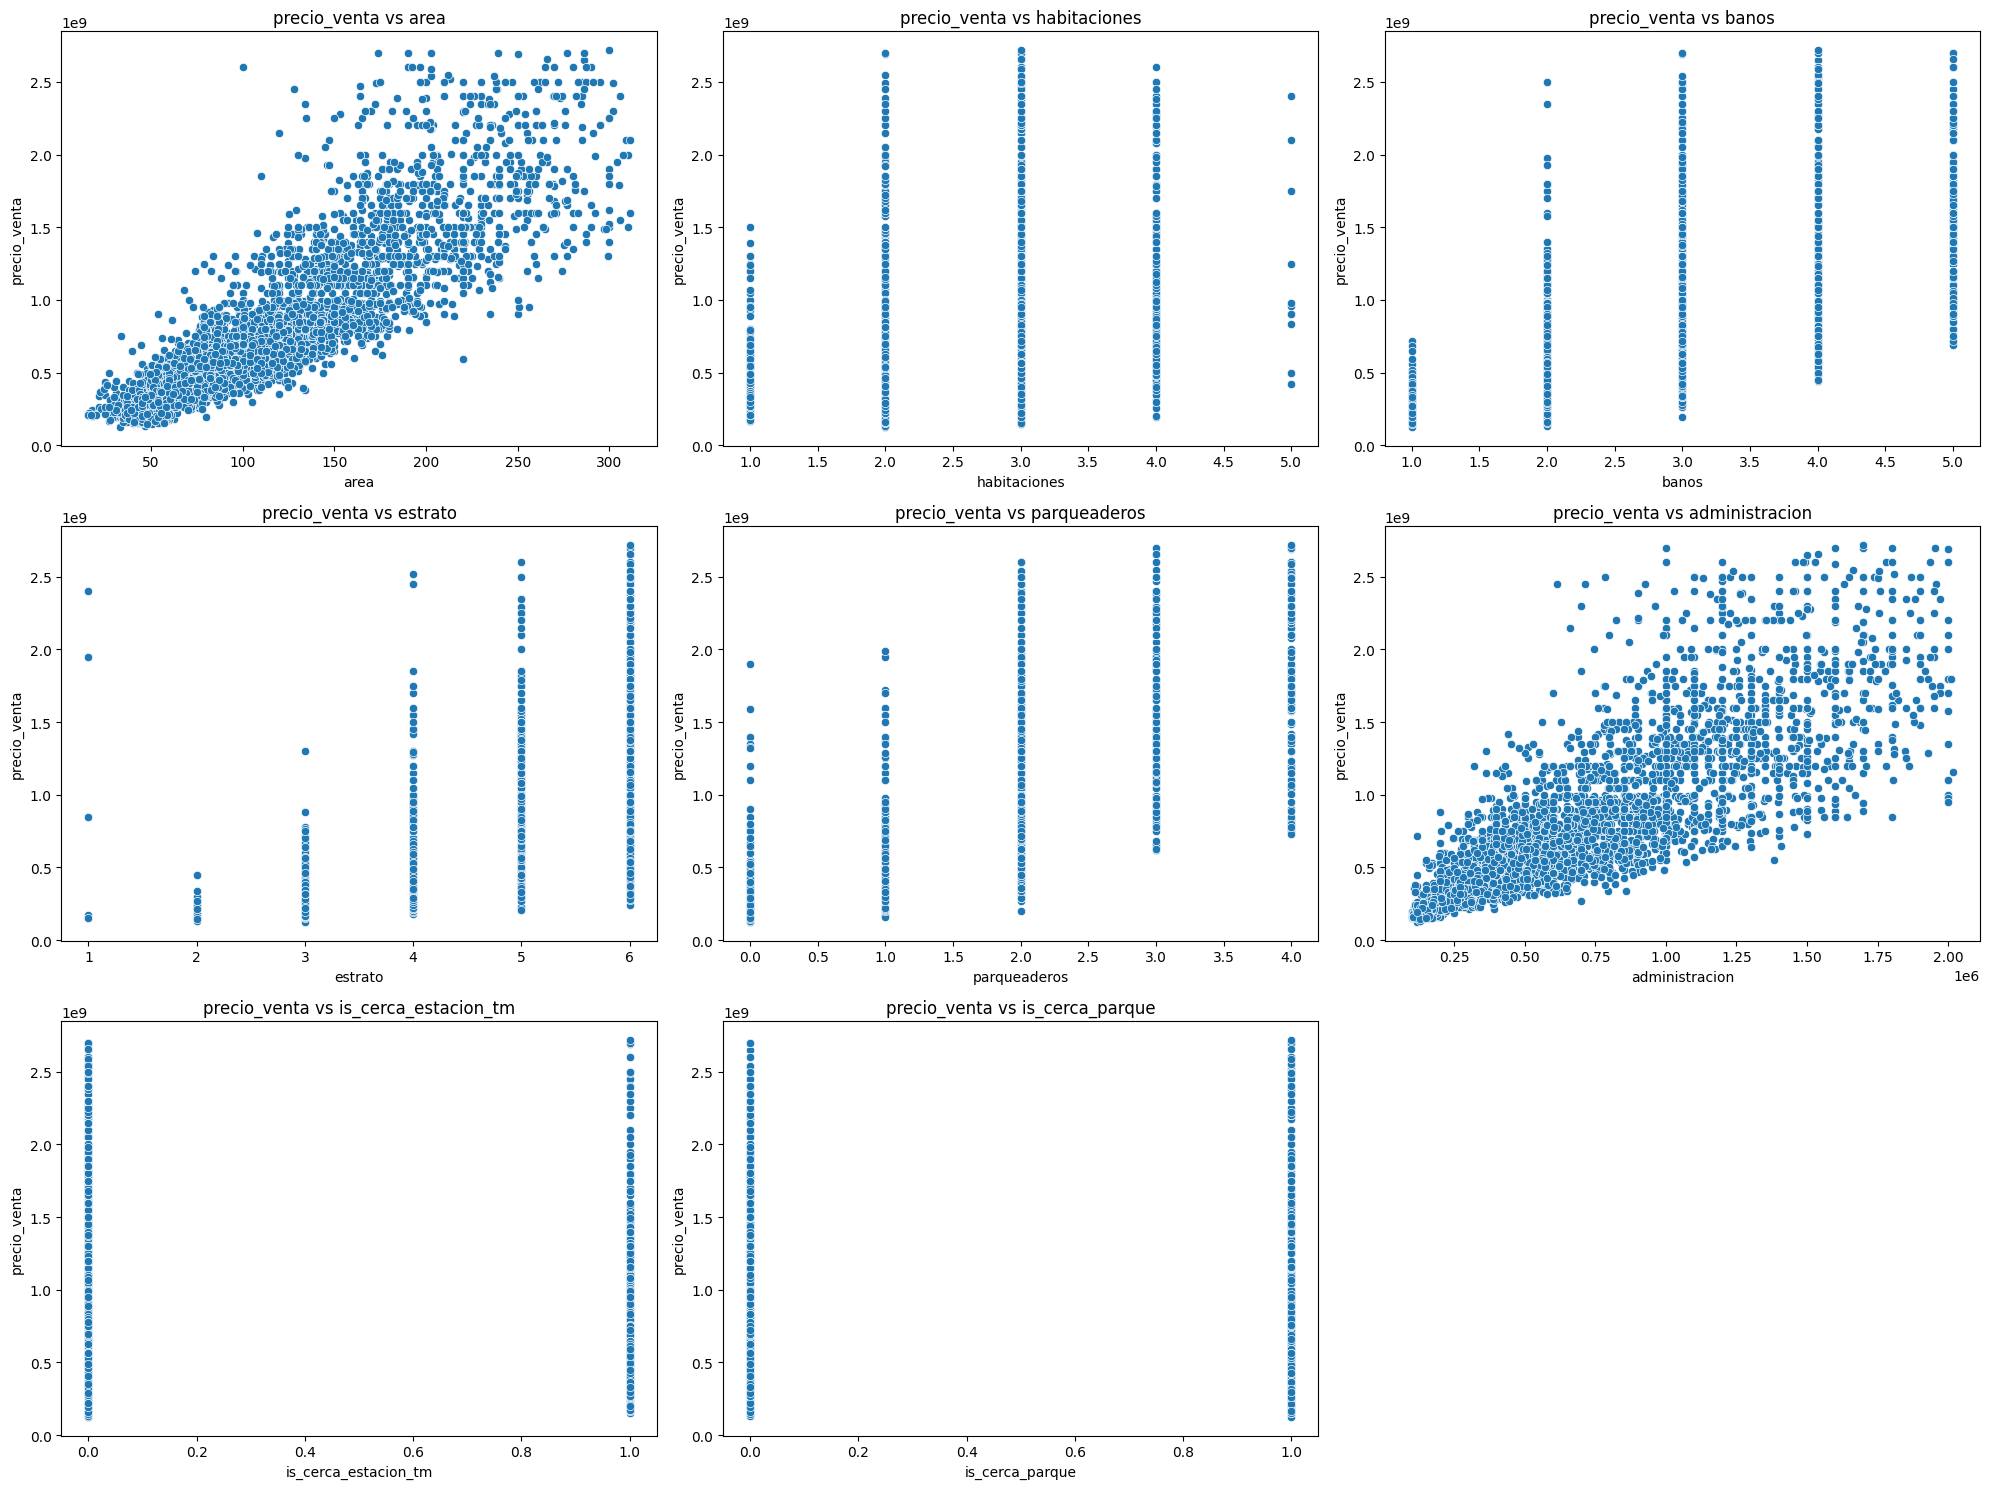

In [48]:
sample_df = apartamentos_modelo_df.sample(frac=0.2)

# Número de columnas para los gráficos por fila
cols = 3
# Número total de gráficos
num_plots = len(columnas_relevantes)

# Crear el grid de subplots
fig, axes = plt.subplots(nrows=(num_plots // cols) + (num_plots % cols > 0), ncols=cols, figsize=(20, 15))
axes = axes.flatten()  # Convertir a una sola lista de ejes

# Generar los gráficos de dispersión
for i, col in enumerate(columnas_relevantes):
    sns.scatterplot(data=sample_df, x=col, y="precio_venta", ax=axes[i])
    axes[i].set_title(f'precio_venta vs {col}')

# Ocultar los ejes sin gráficos si hay alguno vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 2.2. Búsqueda de relaciones entre las variables de entrada


<Axes: >

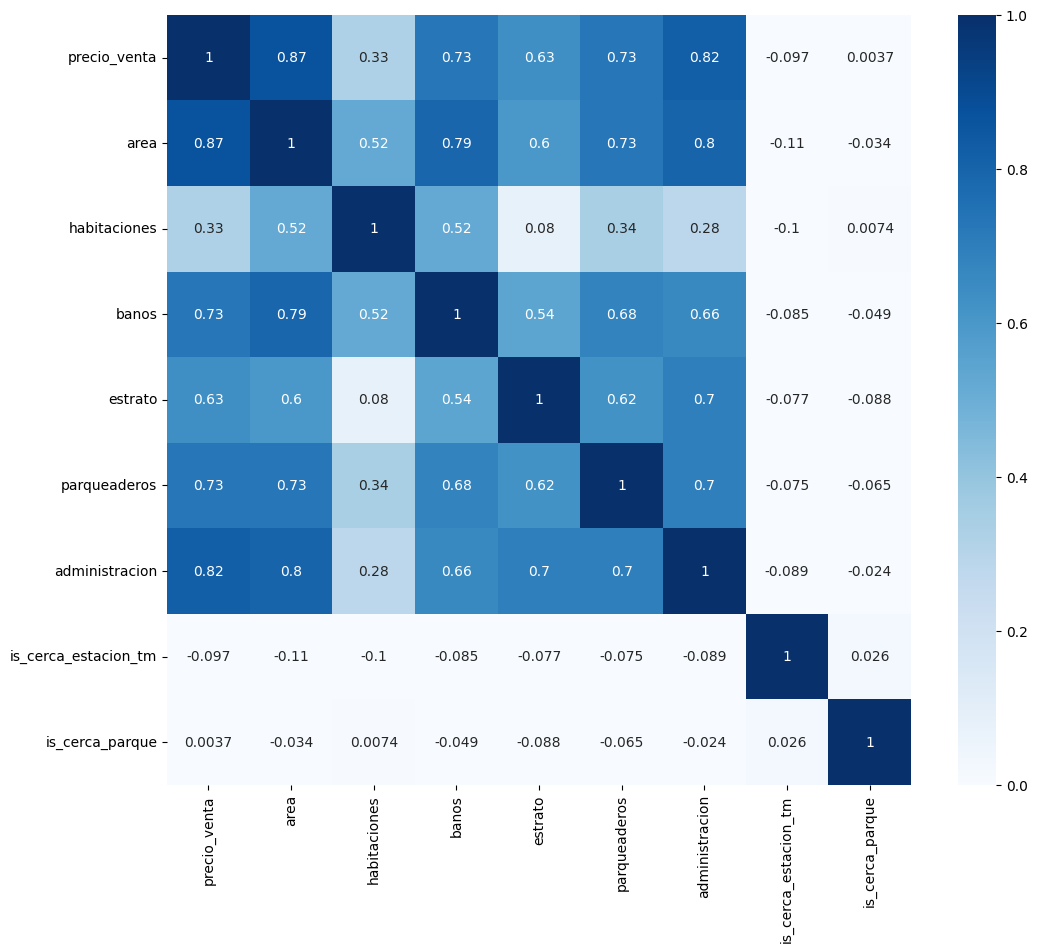

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(apartamentos_modelo_df.corr(), annot=True, cmap="Blues", vmin=0, vmax=1)

## 3. Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.

Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba.

In [50]:
X = apartamentos_modelo_df[columnas_relevantes]
y = apartamentos_modelo_df["precio_venta"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape, y_train.shape

((15404, 8), (15404,))

In [53]:
X_test.shape, y_test.shape

((3851, 8), (3851,))

## 4. Entrenamiento primer modelo de regresión lineal


In [54]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [55]:
pd.DataFrame({"columns": columnas_relevantes, "coef": modelo.coef_})

,columns,coef
0,area,4.934693e+06
1,habitaciones,-9.739358e+07
2,banos,4.997097e+07
3,estrato,1.984620e+06
4,parqueaderos,6.598739e+07
5,administracion,2.987719e+02
6,is_cerca_estacion_tm,-1.109360e+07
7,is_cerca_parque,5.474939e+07


In [56]:
modelo.intercept_

np.float64(12013021.240440369)

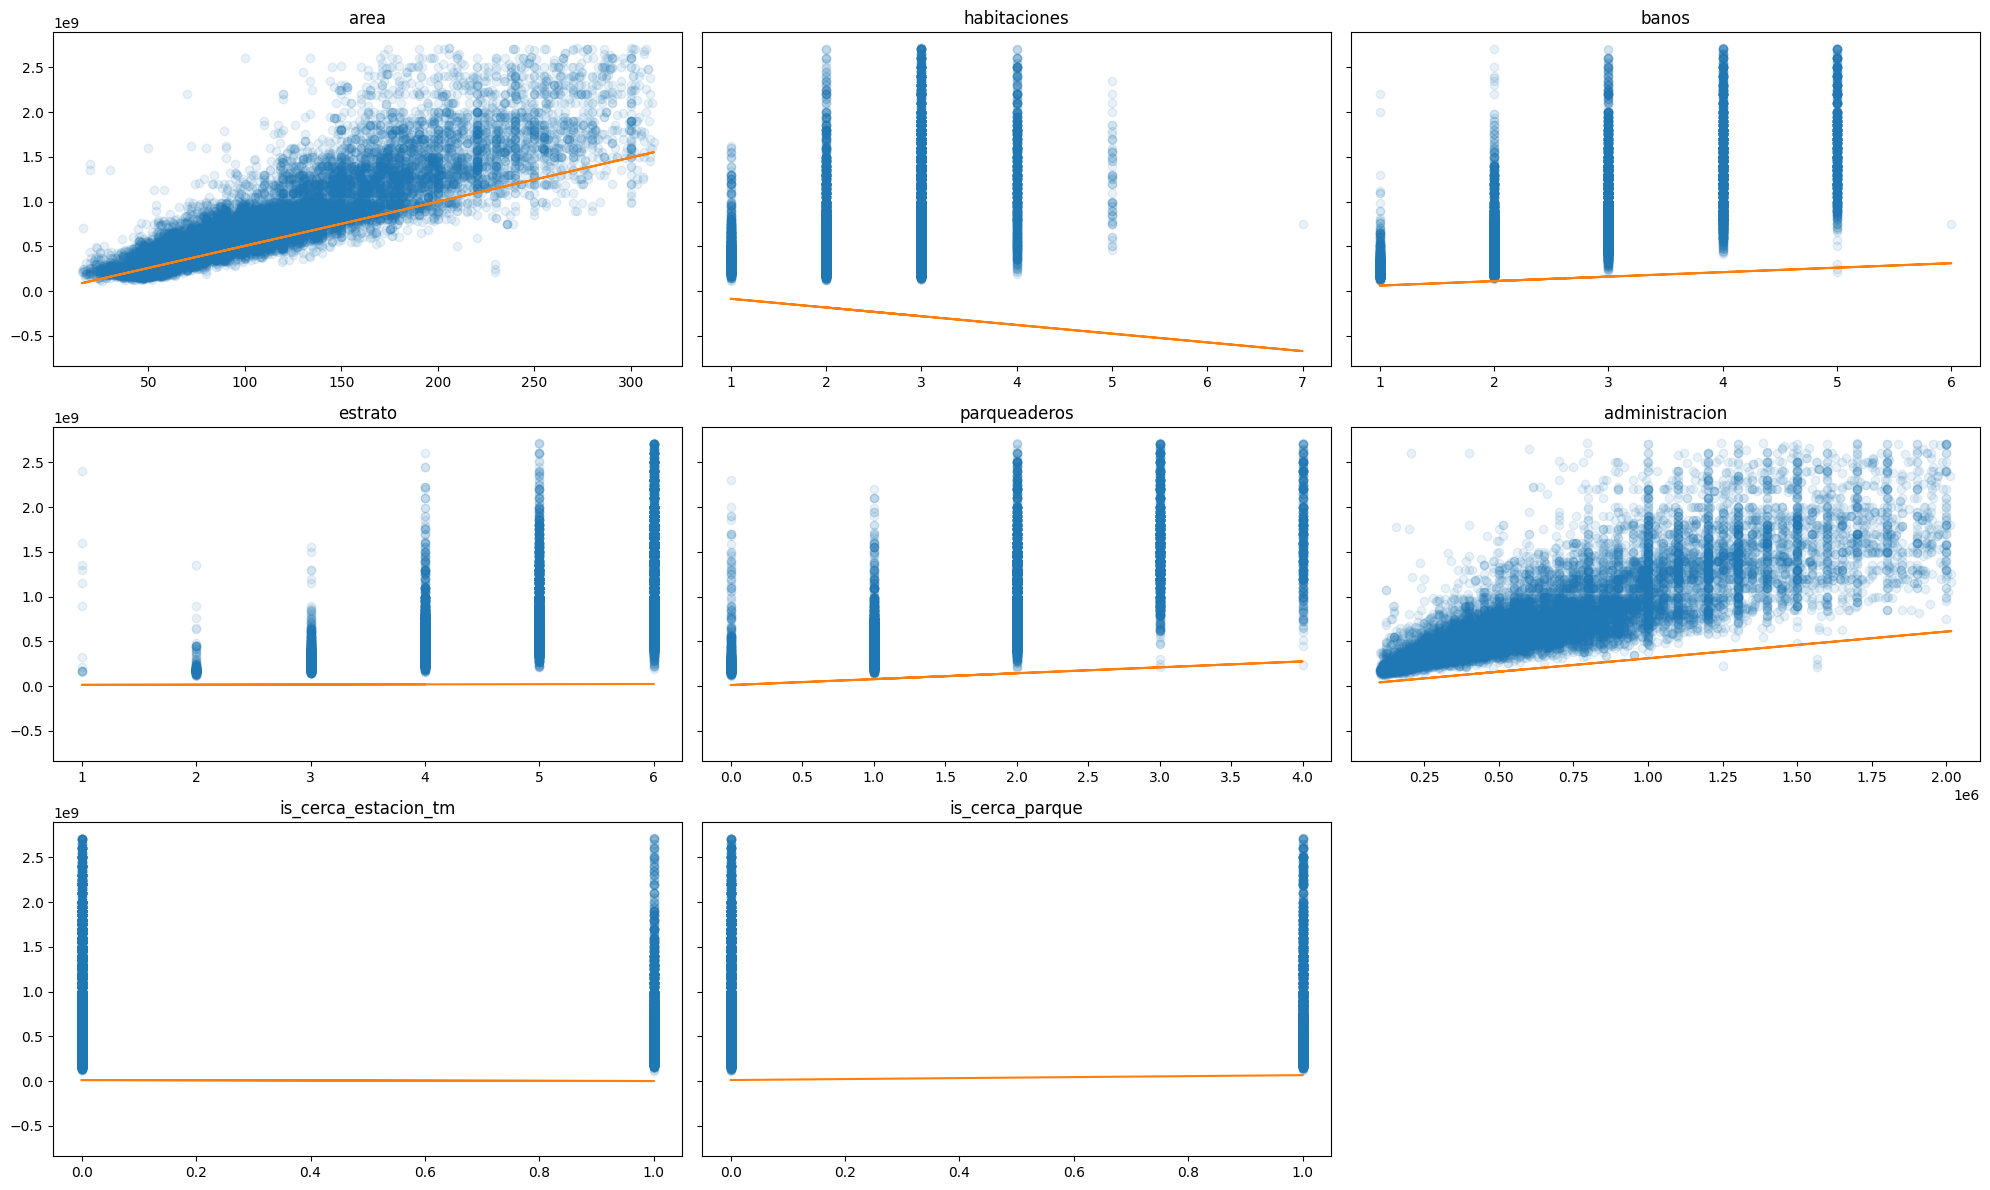

In [57]:
num_columnas = 3
num_filas = (len(columnas_relevantes) + num_columnas - 1) // num_columnas 

f, axs = plt.subplots(num_filas, num_columnas, sharey=True, figsize=(20, 4 * num_filas))

# Aplanar el array de ejes para facilitar el acceso
axs = axs.flatten()

for i, col in enumerate(columnas_relevantes):
    x = X_train[col]
    m = modelo.coef_[i]
    b = modelo.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)


# Ocultar los ejes sin gráficos si hay alguno vacío
for j in range(i + 1, len(axs)):
    f.delaxes(axs[j])


plt.tight_layout()
plt.show()


### 4.1. Predicciones del modelo



In [58]:
y_pred = modelo.predict(X_test)

### 4.2. Validación (evaluación) del modelo

La forma más básica para saber que tan bien se comporta el modelo es midiendo que tanto se alejan las estimaciones o predicciones del mismo respecto a la variable objetivo real. Esta medición se puede hacer tanto para el conjunto de datos de entrenamiento como para el de prueba.

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [59]:
print("Train:", mean_absolute_error(y_train, modelo.predict(X_train)))
print("Test:", mean_absolute_error(y_test, modelo.predict(X_test)))

Train: 156611939.6096594
Test: 153679373.5661008


**Mean Squared Error (MSE)**

In [60]:
print("Train:", mean_squared_error(y_train, modelo.predict(X_train)))
print("Test:", mean_squared_error(y_test, modelo.predict(X_test)))

Train: 5.1553134274992056e+16
Test: 4.971026840025831e+16


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [61]:
print("Train:", np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, modelo.predict(X_test))))

Train: 227053152.97302535
Test: 222957996.9417072


In [62]:
modelo.score(X_train, y_train)

0.8180718654617001

In [63]:
result = print("{:.0f}".format(modelo.predict([[80, 3, 2, 4, 1, 400000, 0, 1]])[0]))

462733700


c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Análisis del error**

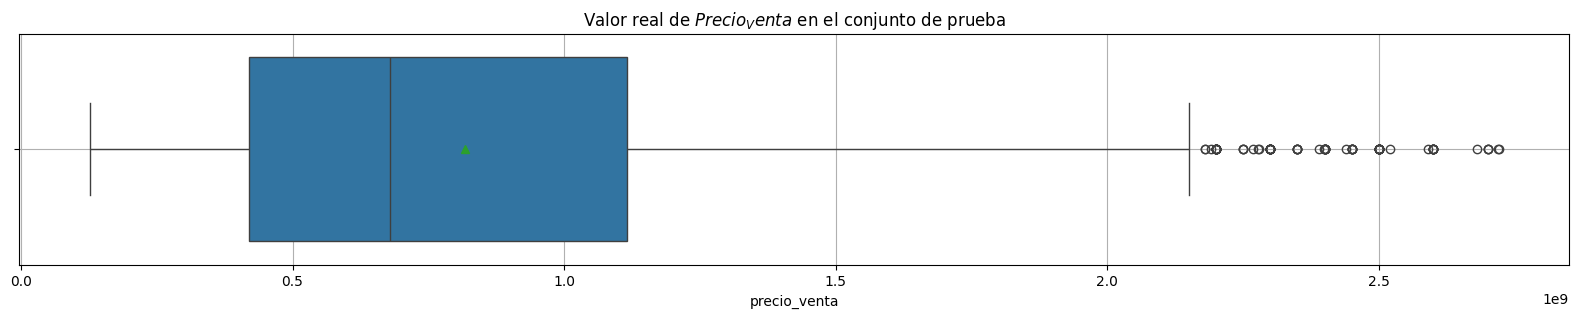

In [64]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{Precio_Venta}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [65]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])


count    3.851000e+03
mean     8.171353e+08
std      5.179648e+08
min      1.263800e+08
25%      4.200000e+08
50%      6.800000e+08
75%      1.115500e+09
99%      2.400000e+09
max      2.720500e+09
Name: precio_venta, dtype: float64

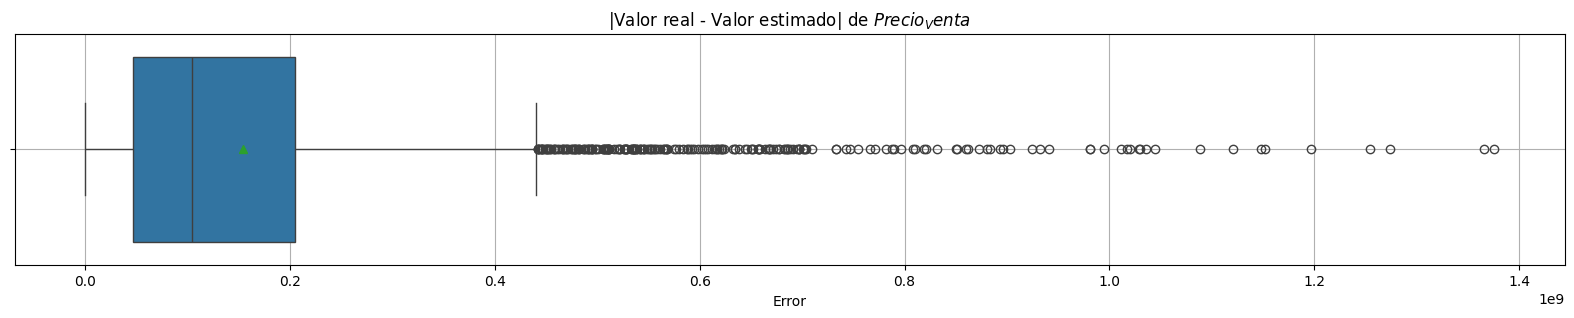

In [66]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - modelo.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Precio_Venta}$")
plt.xlabel("Error")
plt.grid()
plt.show()

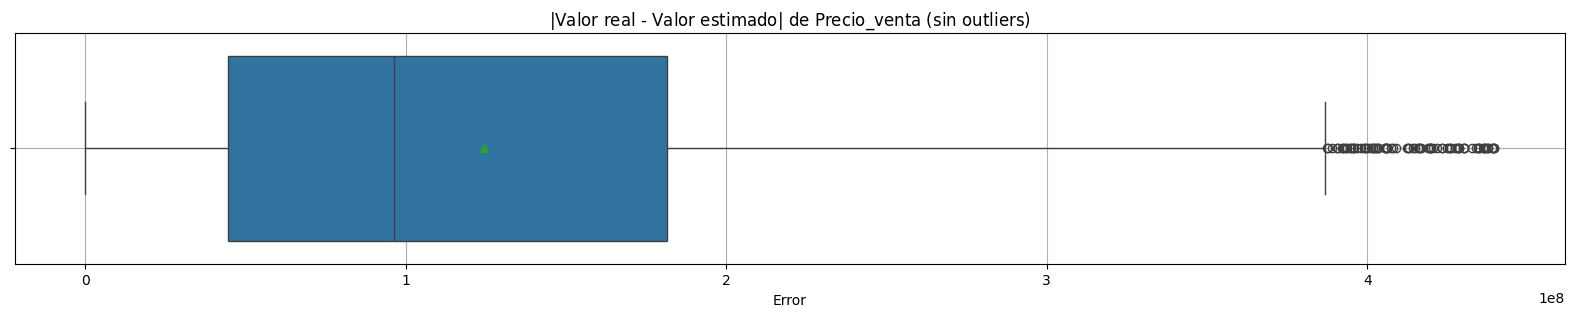

In [67]:
# Calcular el error absoluto
error_absoluto = abs(y_test - modelo.predict(X_test))

# Calcular el rango intercuartílico (IQR) para el error absoluto
Q1 = np.percentile(error_absoluto, 25)
Q3 = np.percentile(error_absoluto, 75)
IQR = Q3 - Q1

# Filtrar valores dentro de 1.5 veces el IQR
error_filtrado = error_absoluto[(error_absoluto >= Q1 - 1.5 * IQR) & (error_absoluto <= Q3 + 1.5 * IQR)]

# Graficar el boxplot sin valores atípicos
plt.figure(figsize=(20, 3))
sns.boxplot(x=error_filtrado, showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\\text{Precio_venta}$ (sin outliers)")
plt.xlabel("Error")
plt.grid()
plt.show()


In [68]:
abs(y_test-modelo.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    3.851000e+03
mean     1.536794e+08
std      1.615540e+08
min      2.557038e+04
25%      4.682141e+07
50%      1.038549e+08
75%      2.043860e+08
95%      4.696498e+08
99%      7.887618e+08
max      1.375926e+09
Name: precio_venta, dtype: float64

Se podría decir que los resultados de este primer modelo NO son aceptables dado que:
1) Las métricas de error para el dataset de entrenamiento y prueba son muy altas. 


## 5. Entrenamiento de un segundo modelo



In [69]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [71]:
pd.DataFrame({"columns": columnas_relevantes, "coef": pipeline["model"].coef_})

,columns,coef
0,area,3.070179e+08
1,habitaciones,-7.248242e+07
2,banos,5.258917e+07
3,estrato,2.214558e+06
4,parqueaderos,5.943856e+07
5,administracion,1.341440e+08
6,is_cerca_estacion_tm,-4.610070e+06
7,is_cerca_parque,2.367632e+07


In [72]:
pipeline["model"].intercept_

np.float64(828380299.5719943)

In [73]:
y_train.mean(), y_test.mean()

(np.float64(828380299.5719943), np.float64(817135295.4585822))

La variable de entrada que mayor tiene impacto en la variable objetivo es `area`, seguida por `administracion`. En cuanto a coeficientes negativos, es la variable `habitaciones` la que tiene el mayor impacto.

In [74]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 156611939.61018178
Test: 153679373.56682947

RMSE:
Train: 227053152.97302535
Test: 222957996.9420355


## 6. Validación de supuestos de la regresión


### 6.1. Colinealidad


<Axes: >

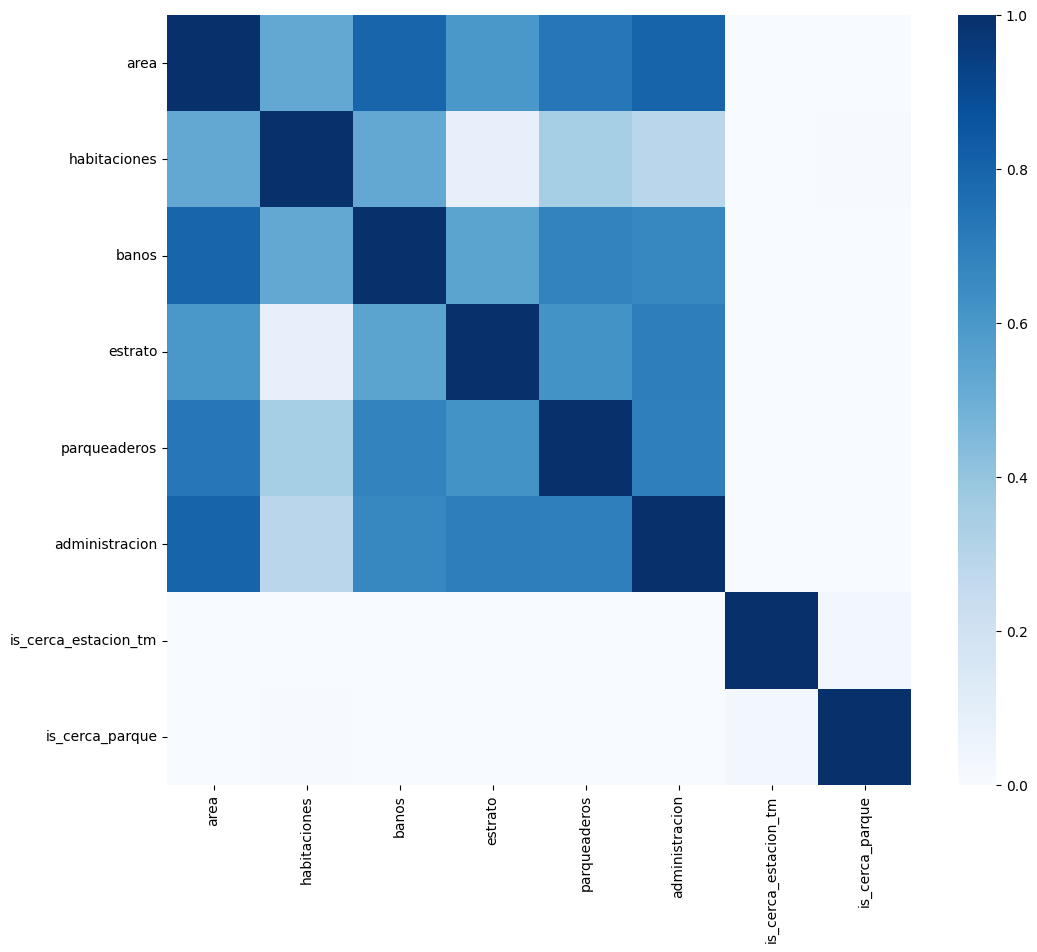

In [75]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [76]:
X_train.corr()

,area,habitaciones,banos,estrato,parqueaderos,administracion,is_cerca_estacion_tm,is_cerca_parque
area,1.000000,0.525617,0.794467,0.600348,0.727438,0.798562,-0.115228,-0.042472
habitaciones,0.525617,1.000000,0.523978,0.083782,0.348345,0.292595,-0.107961,0.004672
banos,0.794467,0.523978,1.000000,0.543520,0.683001,0.665596,-0.092051,-0.056299
estrato,0.600348,0.083782,0.543520,1.000000,0.619728,0.700050,-0.076827,-0.092335
parqueaderos,0.727438,0.348345,0.683001,0.619728,1.000000,0.696816,-0.076941,-0.070459
administracion,0.798562,0.292595,0.665596,0.700050,0.696816,1.000000,-0.092993,-0.033766
is_cerca_estacion_tm,-0.115228,-0.107961,-0.092051,-0.076827,-0.076941,-0.092993,1.000000,0.030553
is_cerca_parque,-0.042472,0.004672,-0.056299,-0.092335,-0.070459,-0.033766,0.030553,1.000000


En este caso particular, no se evidencia una alta colinealidad (> 90%) entre las variables.

### 6.2. Linealidad

Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

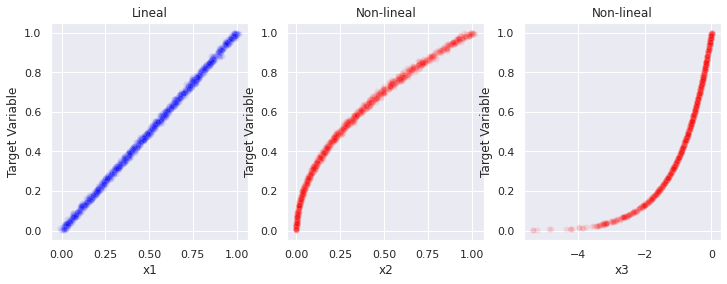

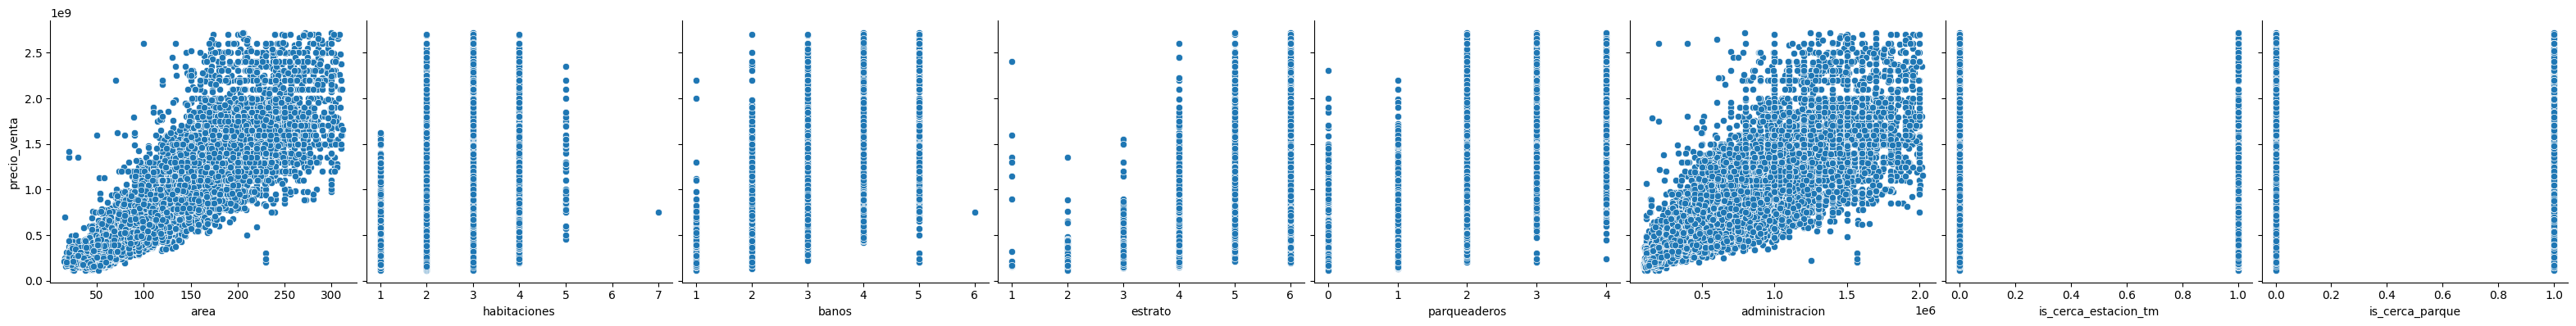

In [77]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="precio_venta", x_vars=columnas_relevantes, kind="scatter")

In [78]:
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [79]:
pipeline.fit(X_train[columnas_relevantes], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [80]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,area,3.838391e+08
1,habitaciones,1.307777e+07
2,banos,-9.561903e+07
3,estrato,-3.196851e+06
4,parqueaderos,-1.551918e+07
5,administracion,1.030549e+08
6,is_cerca_estacion_tm,8.434411e+06
7,is_cerca_parque,-1.043682e+07
8,area^2,-3.627368e+07
9,area habitaciones,-1.818473e+08


In [81]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[columnas_relevantes])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[columnas_relevantes])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[columnas_relevantes]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[columnas_relevantes]))))

MAE:
Train: 148015049.23021528
Test: 145387680.26056796

RMSE:
Train: 220396535.65363264
Test: 217595085.5012382


### 6.3. Normalidad de los errores

Los errores deben tener una distribución normal.

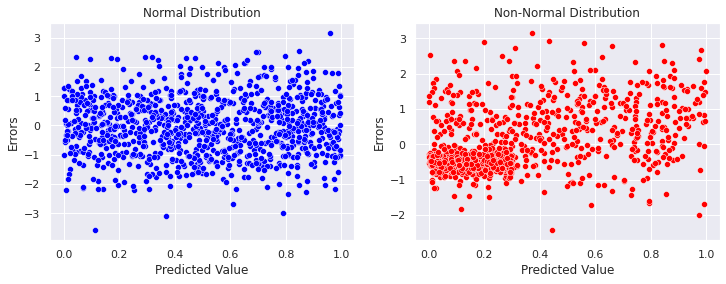

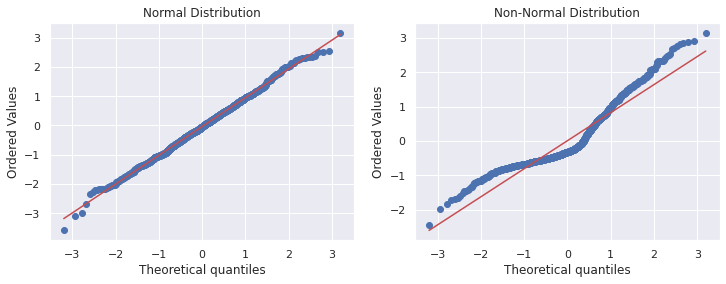

In [82]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [83]:
pipeline.fit(X_train[columnas_relevantes], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [84]:
errors = (pipeline.predict(X_train[columnas_relevantes])-y_train).values

Valores negativos indican subestimación mientras que valores positivos indican sobreestimación.

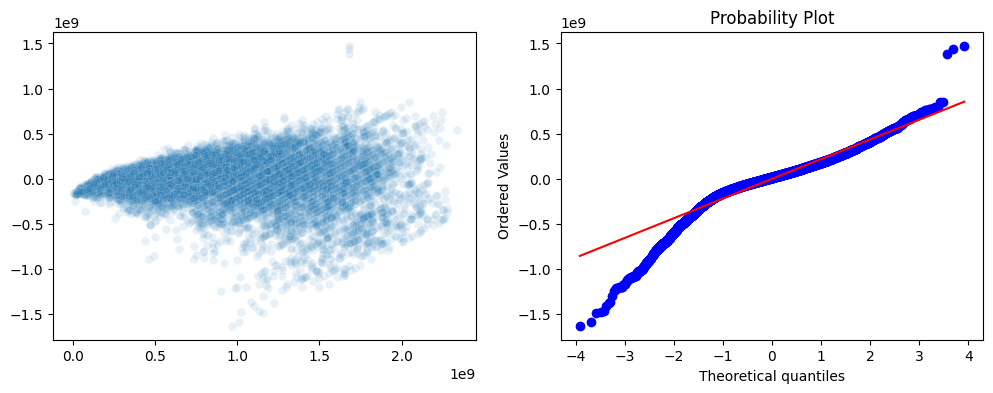

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[columnas_relevantes]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Una estrategia para mejorar este escenario es eliminar los registros cuyo valor de variable objetivo pueda considerarse un valor atípico.

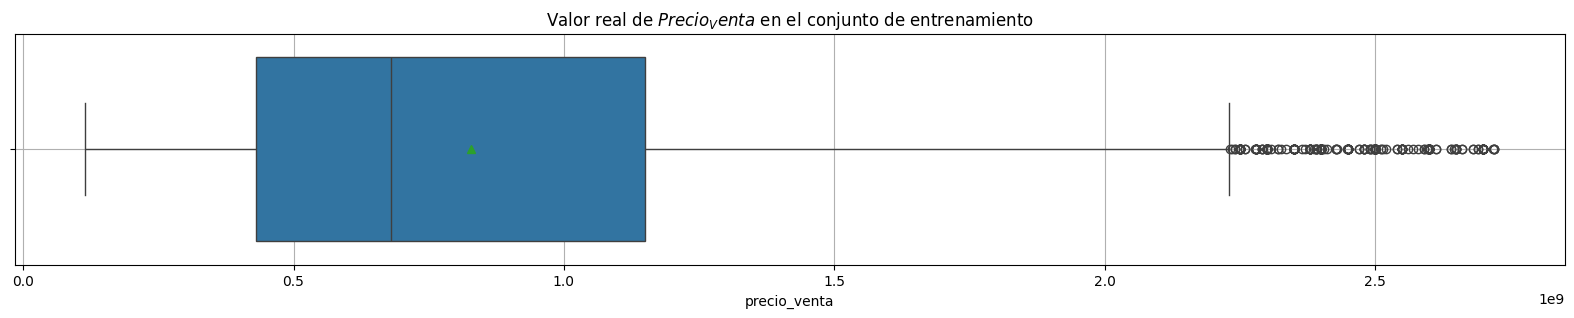

In [86]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Valor real de $\t{Precio_Venta}$ en el conjunto de entrenamiento")
plt.grid()
plt.show()

Para determinar los valores atípicos a remover se puede aplicar la regla $$outlier > Q3 + 1.5*IQR$$

In [87]:
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

np.float64(2230000000.0)

In [88]:
y_train = y_train.loc[y_train <= threshold]
X_train = X_train.loc[y_train.index]

In [89]:
y_test = y_test.loc[y_test <= threshold]
X_test = X_test.loc[y_test.index]

In [90]:
pipeline.fit(X_train[columnas_relevantes], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [91]:
pd.DataFrame({"columns": columnas_relevantes, "coef": pipeline["model"].coef_})

,columns,coef
0,area,2.668222e+08
1,habitaciones,-6.035473e+07
2,banos,5.192293e+07
3,estrato,1.612757e+07
4,parqueaderos,5.082791e+07
5,administracion,1.175262e+08
6,is_cerca_estacion_tm,-4.370426e+06
7,is_cerca_parque,1.701192e+07


In [92]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[columnas_relevantes])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[columnas_relevantes])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[columnas_relevantes]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[columnas_relevantes]))))

MAE:
Train: 139620653.4927713
Test: 138338304.99710765

RMSE:
Train: 196823315.9781471
Test: 196972995.76219696


In [93]:
errors = (pipeline.predict(X_train[columnas_relevantes])-y_train).values

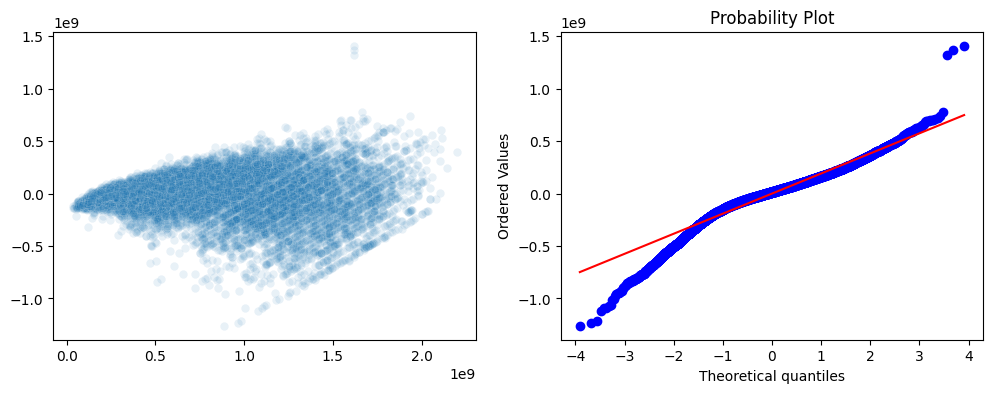

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[columnas_relevantes]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Se siguen teniendo mejoras en las métricas de error pero no se resuelve el problema de no normalidad de los errores.


### 6.4 Varianza constante (Homocedasticidad)

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

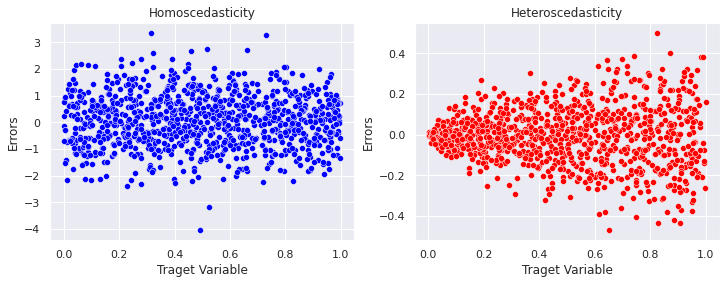

<Axes: >

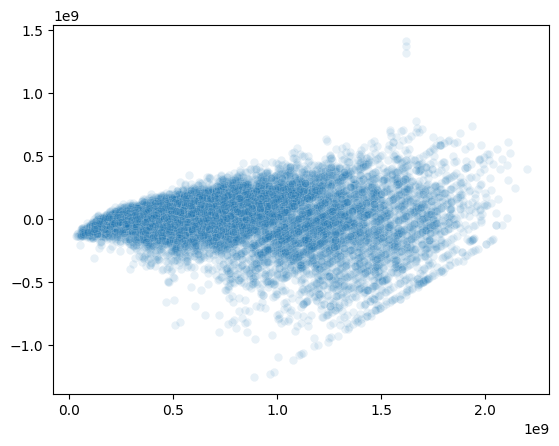

In [95]:
sns.scatterplot(x = pipeline.predict(X_train[columnas_relevantes]), y=errors, alpha=0.1)

Se evidencia que la varianza en los errores no es constante a medida que varía la variable objetivo.